In [1]:
import pandas as pd

df = pd.DataFrame({"Date":[], 'EUR €':[], 'USD $':[], 'GBP £':[]})
date_range = pd.Series(pd.date_range(start='1/1/2021', end='12/31/2021'))
date_range = date_range.dt.strftime('%Y%m%d')
for date in date_range:
    df_t = pd.read_json(f'https://bank.gov.ua/NBUStatService/v1/statdirectory/exchange?date={date}&json')
    df_t = pd.DataFrame({"Date":df_t[df_t['cc']=="EUR"]['exchangedate'].values,
                         'EUR €':df_t[df_t['cc']=="EUR"]['rate'].values,
                         'USD $':df_t[df_t['cc']=="USD"]['rate'].values,
                         'GBP £':df_t[df_t['cc']=="GBP"]['rate'].values})
    df = pd.concat([df,df_t])

In [2]:
df

,Date,EUR €,USD $,GBP £
0,01.01.2021,34.7396,28.2746,38.4393
0,02.01.2021,34.7396,28.2746,38.4393
0,03.01.2021,34.7396,28.2746,38.4393
0,04.01.2021,34.7396,28.2746,38.4393
0,05.01.2021,34.9389,28.4310,38.7344
...,...,...,...,...
0,27.12.2021,30.8450,27.2747,36.6176
0,28.12.2021,30.8196,27.2306,36.5162
0,29.12.2021,30.8401,27.2235,36.6333
0,30.12.2021,30.7760,27.2077,36.5808


In [3]:
df.to_csv('data.csv', index=False)

In [5]:
# підключення до s3
import boto3
s3 = boto3.client('s3', region_name='us-east-1',
  aws_access_key_id='',
  aws_secret_access_key=''
)

In [6]:
# завантаження csv-файлу на бакет
s3 = boto3.client('s3')

with open('data.csv', 'rb') as data:
    s3.upload_fileobj(data, 'sotnikova-bucket', 'data.csv')

In [7]:
# вивантаження з бакету
s3.download_file('sotnikova-bucket', 'data.csv', 'data.csv')

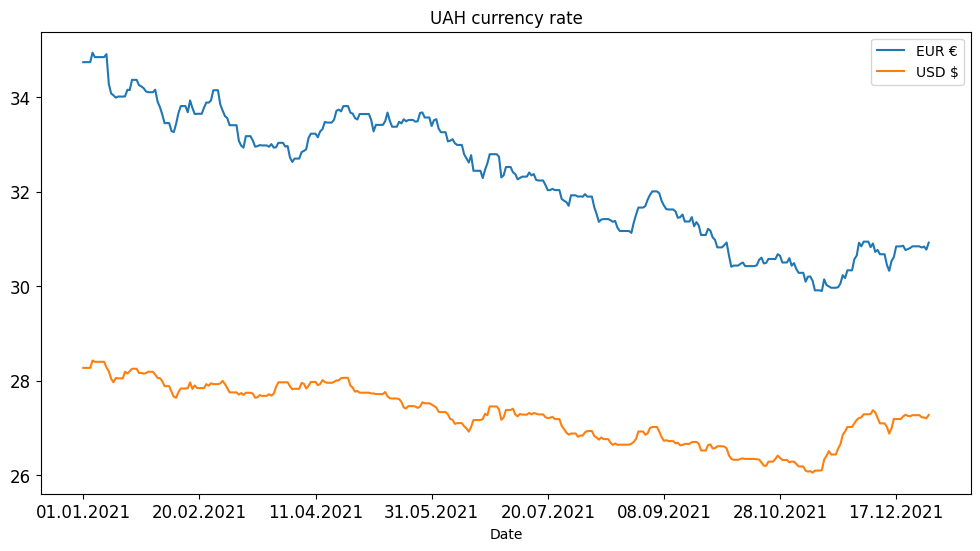

In [8]:
# створення графіку та його збереження
import matplotlib.pyplot as plt
df.plot(x='Date', y=["EUR €", "USD $"], figsize=(12, 6), title="UAH currency rate", fontsize=12)
plt.savefig('plot.png')

In [9]:
# відправка графіку на бакет
with open('plot.png', 'rb') as data:
    s3.upload_fileobj(data, 'sotnikova-bucket', 'plot.png')